In [1]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# let's print the shape of the dataset

In [2]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
# normalizing the data to help with the training
X_train = X_train / 255
X_test = X_test / 255

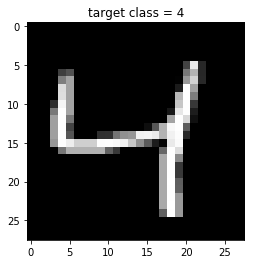

In [11]:
import matplotlib.pyplot as plt

index = 2
plt.title('target class = ' + str(y_train[index]))
plt.imshow(X_train[index], cmap = 'gray')

In [12]:
print(X_train[0].shape)

(28, 28)


### reshape images to n * h * w * # of channels

In [13]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### reshape y_i to y_{i, j}

In [14]:
from keras.utils import np_utils

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [16]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Outline the convolutional neural network

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [21]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1894 - accuracy: 0.9447 - val_loss: 0.0722 - val_accuracy: 0.9778
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0588 - val_accuracy: 0.9805
Epoch 4/10
469/469 [==============================] - 28s 61ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0542 - val_accuracy: 0.9828
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.0519 - val_accuracy: 0.9850
Epoch 7/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0539 - val_accuracy:

In [ ]:
### 60000 / 128 = 469

In [22]:
pred = model.predict(X_test)

In [23]:
pred.shape

(10000, 10)

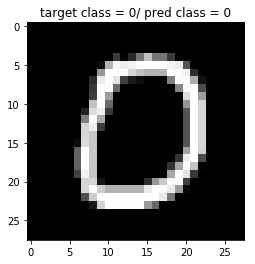

In [25]:
index = 10

import numpy as np
pred_class = np.argmax(pred[index])

plt.title('target class = ' + str(y_test[index]) + '/ pred class = ' + str(pred_class))


plt.imshow(X_test[index].reshape(28, 28), cmap = 'gray')

In [33]:
diff_index = []
for i in range(len(pred)):
    if np.argmax(pred[i]) != np.argmax(Y_test[i]):
        diff_index.append(i)
print(diff_index)

[247, 321, 340, 359, 381, 445, 582, 659, 717, 882, 883, 938, 939, 956, 1014, 1039, 1156, 1202, 1226, 1232, 1242, 1247, 1319, 1378, 1393, 1403, 1414, 1415, 1425, 1522, 1549, 1609, 1641, 1678, 1773, 1790, 1828, 1901, 1903, 2016, 2035, 2040, 2093, 2118, 2129, 2135, 2266, 2293, 2369, 2387, 2406, 2414, 2462, 2488, 2597, 2654, 2896, 2921, 2939, 2953, 3012, 3060, 3073, 3330, 3503, 3520, 3534, 3558, 3727, 3751, 3778, 3780, 3808, 3850, 3853, 3869, 3943, 4075, 4163, 4176, 4199, 4201, 4248, 4256, 4548, 4578, 4601, 4639, 4740, 4807, 4814, 4823, 4860, 5331, 5634, 5654, 5676, 5749, 5887, 5955, 5973, 6011, 6023, 6059, 6091, 6166, 6173, 6555, 6560, 6569, 6597, 6625, 6783, 8094, 8246, 8277, 8325, 8527, 9009, 9015, 9019, 9024, 9505, 9540, 9679, 9692, 9729, 9749, 9770, 9839, 9941, 9982]


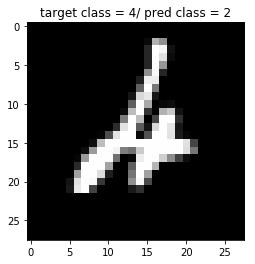

In [34]:
index = 247
pred_class = np.argmax(pred[index])
plt.title('target class = ' + str(y_test[index]) + '/ pred class = ' + str(pred_class))
plt.imshow(X_test[index].reshape(28, 28), cmap = 'gray')

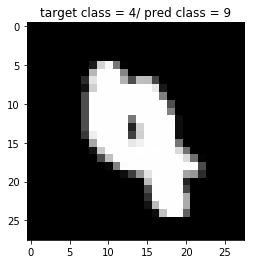

In [35]:
index = 8527
pred_class = np.argmax(pred[index])
plt.title('target class = ' + str(y_test[index]) + '/ pred class = ' + str(pred_class))
plt.imshow(X_test[index].reshape(28, 28), cmap = 'gray')